In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DataSet_root = "./LIDC-IDRI"
Processed_data_dir = './data'
IMAGE_DIR = Processed_data_dir+ "/Image"
MASK_DIR = Processed_data_dir +"/Mask"
Clean_IMAGE_DIR =Processed_data_dir + '/CleanIMAGE'
Clean_MASK_DIR = Processed_data_dir +'/CleanMASK'
mask_thresh = 8

In [3]:
dataset = pd.read_csv(Processed_data_dir + '/dataset.csv')

In [4]:
dataset[dataset["is_cancer"]=='False']

,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean
36,3,0,62,./data/IMAGE/LIDC-IDRI-0003/Nodule0Slice62,./data/MASK/LIDC-IDRI-0003/Mask0Slice62,2,False,False
37,3,0,63,./data/IMAGE/LIDC-IDRI-0003/Nodule0Slice63,./data/MASK/LIDC-IDRI-0003/Mask0Slice63,2,False,False
38,3,0,64,./data/IMAGE/LIDC-IDRI-0003/Nodule0Slice64,./data/MASK/LIDC-IDRI-0003/Mask0Slice64,2,False,False
39,3,0,65,./data/IMAGE/LIDC-IDRI-0003/Nodule0Slice65,./data/MASK/LIDC-IDRI-0003/Mask0Slice65,2,False,False
40,3,0,66,./data/IMAGE/LIDC-IDRI-0003/Nodule0Slice66,./data/MASK/LIDC-IDRI-0003/Mask0Slice66,2,False,False
...,...,...,...,...,...,...,...,...
1005,67,3,172,./data/IMAGE/LIDC-IDRI-0067/Nodule3Slice172,./data/MASK/LIDC-IDRI-0067/Mask3Slice172,2,False,False
1006,67,3,173,./data/IMAGE/LIDC-IDRI-0067/Nodule3Slice173,./data/MASK/LIDC-IDRI-0067/Mask3Slice173,2,False,False
1007,67,3,174,./data/IMAGE/LIDC-IDRI-0067/Nodule3Slice174,./data/MASK/LIDC-IDRI-0067/Mask3Slice174,2,False,False
1052,69,1,52,./data/IMAGE/LIDC-IDRI-0069/Nodule1Slice52,./data/MASK/LIDC-IDRI-0069/Mask1Slice52,2,False,False


In [5]:
dataset["is_cancer"].value_counts()

True         566
Ambiguous    284
False        214
Name: is_cancer, dtype: int64

In [6]:
dataset[dataset["is_cancer"]=="Ambiguous"].count()

patient_id        284
nodule_no         284
slice_no          284
original_image    284
mask_image        284
malignancy        284
is_cancer         284
is_clean          284
dtype: int64

In [7]:
def balance_dataset(dataset):
    balance_count = min(dataset[dataset["is_cancer"]=="False"].count()[0],min(dataset[dataset["is_cancer"]=="True"].count()[0],dataset[dataset["is_cancer"]=="Ambiguous"].count()[0]))
    sampled_ds = pd.DataFrame(index=[],columns=['patient_id','nodule_no','slice_no','original_image','mask_image','malignancy','is_cancer','is_clean'])
    sampled_ds = sampled_ds.append(dataset[dataset["is_cancer"]=="Ambiguous"].sample(balance_count))
    sampled_ds = sampled_ds.append(dataset[dataset["is_cancer"]=="True"].sample(balance_count))
    sampled_ds = sampled_ds.append(dataset[dataset["is_cancer"]=="False"].sample(balance_count))
    sampled_ds = sampled_ds.reset_index()
    return sampled_ds

In [13]:
balanced_ds = balance_dataset(dataset)
balanced_ds

,index,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean
0,471,39,4,176,./data/IMAGE/LIDC-IDRI-0039/Nodule4Slice176,./data/MASK/LIDC-IDRI-0039/Mask4Slice176,3,Ambiguous,False
1,73,6,1,68,./data/IMAGE/LIDC-IDRI-0006/Nodule1Slice68,./data/MASK/LIDC-IDRI-0006/Mask1Slice68,3,Ambiguous,False
2,1062,70,1,80,./data/IMAGE/LIDC-IDRI-0070/Nodule1Slice80,./data/MASK/LIDC-IDRI-0070/Mask1Slice80,3,Ambiguous,False
3,157,12,2,58,./data/IMAGE/LIDC-IDRI-0012/Nodule2Slice58,./data/MASK/LIDC-IDRI-0012/Mask2Slice58,3,Ambiguous,False
4,400,30,1,81,./data/IMAGE/LIDC-IDRI-0030/Nodule1Slice81,./data/MASK/LIDC-IDRI-0030/Mask1Slice81,3,Ambiguous,False
...,...,...,...,...,...,...,...,...,...
637,61,4,0,75,./data/IMAGE/LIDC-IDRI-0004/Nodule0Slice75,./data/MASK/LIDC-IDRI-0004/Mask0Slice75,1,False,False
638,353,26,0,89,./data/IMAGE/LIDC-IDRI-0026/Nodule0Slice89,./data/MASK/LIDC-IDRI-0026/Mask0Slice89,2,False,False
639,69,5,2,87,./data/IMAGE/LIDC-IDRI-0005/Nodule2Slice87,./data/MASK/LIDC-IDRI-0005/Mask2Slice87,2,False,False
640,354,26,0,90,./data/IMAGE/LIDC-IDRI-0026/Nodule0Slice90,./data/MASK/LIDC-IDRI-0026/Mask0Slice90,2,False,False


In [14]:
import tensorflow as tf


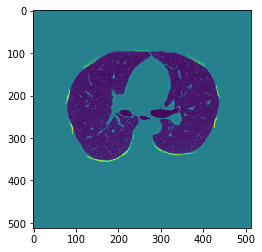

'./data/IMAGE/LIDC-IDRI-0061/Nodule1Slice69'